In [1]:
%%time
import gensim
import pandas as pd
import dataframe_image as dfi
import gensim.downloader as api


CPU times: user 1.54 s, sys: 298 ms, total: 1.84 s
Wall time: 3.23 s


In [2]:
%%time
google_wv = api.load('word2vec-google-news-300')

CPU times: user 35.5 s, sys: 1.59 s, total: 37 s
Wall time: 38.3 s


In [3]:
results = google_wv.most_similar(positive=['king','woman'],negative=['man'])
columns = ['Word', 'Similarity']
display(pd.DataFrame(results, columns=columns))

,Word,Similarity
0,queen,0.711819
1,monarch,0.618967
2,princess,0.590243
3,crown_prince,0.549946
4,prince,0.537732
5,kings,0.523684
6,Queen_Consort,0.523595
7,queens,0.518113
8,sultan,0.509859
9,monarchy,0.508741


In [4]:
results = google_wv.most_similar(positive=['taliban','evil'])
columns = ['Word', 'Similarity']
display(pd.DataFrame(results, columns=columns))

,Word,Similarity
0,al_queda,0.671339
1,radical_islam,0.646119
2,satan,0.642825
3,satans,0.642270
4,evil_doers,0.632466
5,Islamofacists,0.623744
6,al_qaeda,0.622799
7,Al_Quida,0.622467
8,saddam,0.619071
9,evildoers,0.611564


In [5]:
results = google_wv.most_similar(positive=['taliban','good'],negative=['evil'])
columns = ['Word', 'Similarity']
display(pd.DataFrame(results, columns=columns))

,Word,Similarity
0,decent,0.514950
1,nice,0.489606
2,excellant,0.450208
3,agood,0.446547
4,COACH_BLUDER,0.442779
5,great,0.440422
6,gud,0.428197
7,better,0.423307
8,smae,0.422940
9,RICH_BEEM,0.422519


In [7]:
import pandas as pd
import dataframe_image as dfi

def most_similar_terms(seed_terms, model):
    
    data = {}
    topn = 10
    
    for seed_term in seed_terms:
        try:
            data[seed_term] = [f'{sim[0].title()}, ({round(sim[1], 3)})' for sim in model.most_similar(seed_term.lower(), topn=topn)]
        except:
            print(f'{seed_term} not in vocab')
            pass
        
    index = [x for x in range(1, topn+1)]
    
        
    return pd.DataFrame(data, index=index)

terms = ['Friend', 'Enemy', 'Terrorist', 'Good', 'Bad', 'Evil', 'Parasite']

df = most_similar_terms(terms, google_wv)
display(df)
dfi.export(df, 'Google_News.png')

,Friend,Enemy,Terrorist,Good,Bad,Evil,Parasite
1,"Pal, (0.748)","Enemies, (0.779)","Terror, (0.848)","Great, (0.729)","Good, (0.719)","Malevolent, (0.645)","Parasites, (0.794)"
2,"Friends, (0.71)","Adversary, (0.627)","Terrorists, (0.8)","Bad, (0.719)","Terrible, (0.683)","Wickedness, (0.634)","Bacterium, (0.69)"
3,"Buddy, (0.697)","Adversaries, (0.594)","Terrorism, (0.752)","Terrific, (0.689)","Horrible, (0.67)","Evil_Doers, (0.633)","Malaria_Parasite, (0.68)"
4,"Dear_Friend, (0.696)","Hostiles, (0.583)","Al_Qaeda, (0.731)","Decent, (0.684)","Bad, (0.67)","Demonic, (0.631)","Parasitic_Worms, (0.671)"
5,"Acquaintance, (0.684)","Old_Mariam_Sajadi, (0.56)","Terrorist, (0.718)","Nice, (0.684)","Lousy, (0.665)","Villainous, (0.628)","Protozoan_Parasite, (0.665)"
6,"Cousin, (0.671)","Inevitably_Schulberg, (0.548)","Al_Qaeda, (0.708)","Excellent, (0.644)","Crummy, (0.568)","Evil, (0.611)","Pathogen, (0.658)"
7,"Girlfriend, (0.623)","Heartless_Ruthless, (0.535)","Extremist, (0.681)","Fantastic, (0.641)","Horrid, (0.565)","Evil_Incarnate, (0.607)","Bacteria, (0.653)"
8,"Colleague, (0.62)","Must_Outthink_Outwork, (0.534)","Al_Qa'Ida, (0.68)","Better, (0.612)","Awful, (0.553)","Satanic, (0.599)","Microfilariae, (0.644)"
9,"Uncle, (0.612)","Islamofascist_Terrorists, (0.53)","Jihadist, (0.679)","Solid, (0.581)","Dreadful, (0.553)","Satan, (0.593)","Parasitic_Worm, (0.64)"
10,"Roommate, (0.612)","Aggressors, (0.527)","Al_Qaida, (0.675)","Lousy, (0.576)","Horrendous, (0.545)","Evilness, (0.591)","Protozoan, (0.638)"


objc[31777]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5e134ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.103/Libraries/libGLESv2.dylib (0x110427668). One of the two will be used. Which one is undefined.
[1012/154840.691899:INFO:headless_shell.cc(660)] Written to file /var/folders/1f/_bmdf7fs74g5yl2_4y7kq6_m0000gq/T/tmpo77xoueu/temp.png.


In [8]:
%%time

import datetime
import os

import spacy
nlp = spacy.load("en_core_web_md")
nlp.add_pipe('merge_entities', after = 'ner')
display(pd.DataFrame({'spaCy pipeline components': nlp.pipe_names}).T)

def get_dataset_dirpath(cwd):
    
    two_up = os.path.dirname(os.path.dirname(cwd))
    
    return os.path.join(two_up, 'dataset')

dataset_dirpath = get_dataset_dirpath(os.getcwd())

binladenpath = os.path.join(dataset_dirpath, 'Osama bin Laden/')
bushpath = os.path.join(dataset_dirpath, 'George Bush/')


Bush_FileList = [
    '20010914-Remarks at the National Day of Prayer & Remembrance Service.txt',
    '20010915-First Radio Address following 911.txt',
    '20010917-Address at Islamic Center of Washington, D.C..txt',
    '20010920-Address to Joint Session of Congress Following 911 Attacks.txt',
    '20010911-911 Address to the Nation.txt',
    '20011007-Operation Enduring Freedom in Afghanistan Address to the Nation.txt',
    '20011011-911 Pentagon Remembrance Address.txt',
    '20011011-Prime Time News Conference on War on Terror.txt',
    '20011026-Address on Signing the USA Patriot Act of 2001.txt',
    '20011110-First Address to the United Nations General Assembly.txt',
    '20011211-Address to Citadel Cadets.txt',
    '20011211-The World Will Always Remember 911.txt',
    '20020129-First (Official) Presidential State of the Union Address.txt'
]

raw = ""
for file in Bush_FileList:
    with open(os.path.join(bushpath, file), 'r') as text:
        raw = raw + text.read()
        
print(f'doc length: {len(raw)}')

doc = nlp(raw)

seed_terms_good = ['friend', 'good']
seed_terms_bad = ['enemy', 'terrorist', 'terror', 'bad', 'evil', 'murder']
seed_terms = seed_terms_good + seed_terms_bad
ents_of_interest = set([ent.text.replace(' ', '_') for ent in doc.ents if ent.label_ in ["PERSON", "ORG", "GPE", "NORP"]])

,0,1,2,3,4,5,6
spaCy pipeline components,tok2vec,tagger,parser,attribute_ruler,lemmatizer,ner,merge_entities


doc length: 111934
CPU times: user 5.73 s, sys: 516 ms, total: 6.25 s
Wall time: 6.08 s


creating tokens and labels
building tsne model
constructing graph


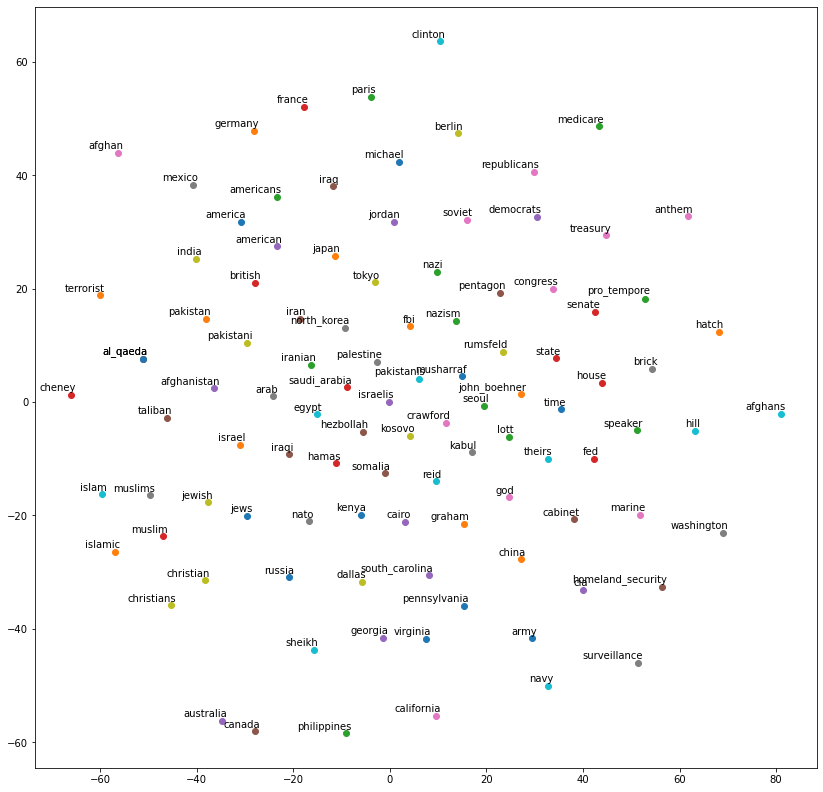

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model, set_array):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    print('creating tokens and labels')
#     for word in model.wv.key_to_index:
#         tokens.append(model.wv[word])
#         labels.append(word)
    
    set_array = [token.lower() for token in set_array]
    
    for word in set_array:
        if word in model.index_to_key:
            tokens.append(model[word])
            labels.append(word)
    
    
    print('building tsne model')
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    
    print('constructing graph')
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(14, 14)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        if labels[i] in set_array:
            plt.annotate(labels[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')
            
    plt.savefig('vector_distribution.png')
    plt.show()
        
tsne_plot(google_wv, ents_of_interest)